In [140]:
# import libraries
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import MultiLabelBinarizer

In [141]:
# load data
df = pd.read_csv('zomato.csv')
df.head(5)

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

# Exploratory Data Analysis

In [142]:
# summary of dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [143]:
# counting duplicates
df.duplicated().sum()

0

In [144]:
# removing unnecessary columns
df.drop(['url' , 'address' , 'phone' , 'dish_liked' , 'reviews_list' , 'menu_item'] , axis = 1 , inplace = True)

In [145]:
# counting duplicates again
df.duplicated().sum()

108

In [146]:
# removing duplicates
df.drop_duplicates(inplace = True)

In [147]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [148]:
# resetting the index and dropping the old index
df.reset_index(drop = True , inplace = True)

### Exploring (online_order) Column

In [149]:
# counting the occurrences of unique values & normalizing to get percentage
df['online_order'].value_counts(normalize = True) * 100

Yes    58.828886
No     41.171114
Name: online_order, dtype: float64

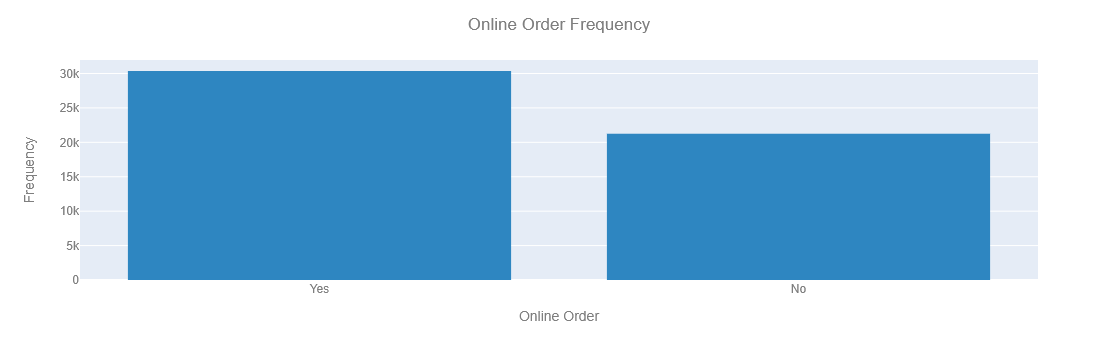

In [150]:
fig = px.histogram(df , x = "online_order" , color_discrete_sequence = ['#2E86C1'] )

fig.update_layout(
    title = {
        'text': "Online Order Frequency",
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title = "Online Order",
    yaxis_title = "Frequency",
    font = dict(
        family = "Arial",
        size = 12,
        color = "#7f7f7f"
    )
)

fig.show()

### Exploring (book_table) Column

In [151]:
df['book_table'].value_counts(normalize = True) * 100

No     87.56806
Yes    12.43194
Name: book_table, dtype: float64

### Exploring (rate) Column

In [152]:
# display unique values
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [153]:
# cleaning rate column
df['rate'] = df['rate'].astype(str).apply(lambda x : float(x.split('/')[0]) if '/' in x else np.nan)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51609 entries, 0 to 51608
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51609 non-null  object 
 1   online_order                 51609 non-null  object 
 2   book_table                   51609 non-null  object 
 3   rate                         41590 non-null  float64
 4   votes                        51609 non-null  int64  
 5   location                     51588 non-null  object 
 6   rest_type                    51382 non-null  object 
 7   cuisines                     51564 non-null  object 
 8   approx_cost(for two people)  51265 non-null  object 
 9   listed_in(type)              51609 non-null  object 
 10  listed_in(city)              51609 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.3+ MB


In [155]:
# descriptive analysis
df['rate'].describe()

count    41590.000000
mean         3.700142
std          0.440451
min          1.800000
25%          3.400000
50%          3.700000
75%          4.000000
max          4.900000
Name: rate, dtype: float64

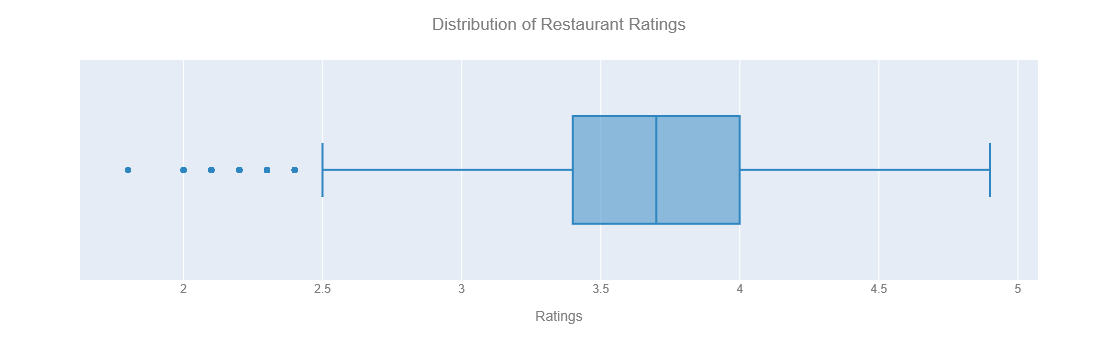

In [156]:
# check for outliers
fig = px.box(df, x = "rate", color_discrete_sequence = ['#2E86C1'] )

fig.update_layout(
    title = {
        "text":"Distribution of Restaurant Ratings",
        "x": 0.5,
        "y": 0.95,
        "xanchor":"center",
        "yanchor":"top"
    },
    xaxis_title="Ratings",
    font=dict(
        family="Arial",
        size=12,
        color="#7f7f7f"
    )
)

fig.show()

### Exploring (votes) Column

In [157]:
df['votes'].describe()

count    51609.000000
mean       283.283361
std        803.282771
min          0.000000
25%          7.000000
50%         41.000000
75%        198.000000
max      16832.000000
Name: votes, dtype: float64

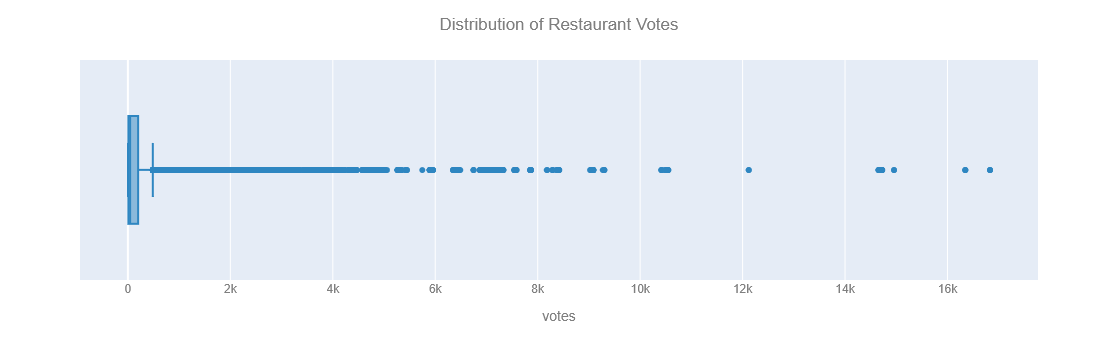

In [158]:
fig = px.box(df, x = "votes", color_discrete_sequence = ['#2E86C1'])

fig.update_layout(
    title = {
        "text":"Distribution of Restaurant Votes",
        "x": 0.5,
        "y": 0.95,
        "xanchor":"center",
        "yanchor":"top"
    },
    font = dict(
        family = "Arial",
        size = 12,
        color = "#7f7f7f"
    )
)

fig.show()

### Exploring (location) Column

In [159]:
df['location'].value_counts()

BTM                      5109
HSR                      2521
Koramangala 5th Block    2502
JP Nagar                 2234
Whitefield               2140
                         ... 
West Bangalore              6
Yelahanka                   6
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

In [160]:
# sorting and identifying unique locations, accounting for typos,variations
sorted(df['location'].astype(str).unique())

['BTM',
 'Banashankari',
 'Banaswadi',
 'Bannerghatta Road',
 'Basavanagudi',
 'Basaveshwara Nagar',
 'Bellandur',
 'Bommanahalli',
 'Brigade Road',
 'Brookefield',
 'CV Raman Nagar',
 'Central Bangalore',
 'Church Street',
 'City Market',
 'Commercial Street',
 'Cunningham Road',
 'Domlur',
 'East Bangalore',
 'Ejipura',
 'Electronic City',
 'Frazer Town',
 'HBR Layout',
 'HSR',
 'Hebbal',
 'Hennur',
 'Hosur Road',
 'ITPL Main Road, Whitefield',
 'Indiranagar',
 'Infantry Road',
 'JP Nagar',
 'Jakkur',
 'Jalahalli',
 'Jayanagar',
 'Jeevan Bhima Nagar',
 'KR Puram',
 'Kaggadasapura',
 'Kalyan Nagar',
 'Kammanahalli',
 'Kanakapura Road',
 'Kengeri',
 'Koramangala',
 'Koramangala 1st Block',
 'Koramangala 2nd Block',
 'Koramangala 3rd Block',
 'Koramangala 4th Block',
 'Koramangala 5th Block',
 'Koramangala 6th Block',
 'Koramangala 7th Block',
 'Koramangala 8th Block',
 'Kumaraswamy Layout',
 'Langford Town',
 'Lavelle Road',
 'MG Road',
 'Magadi Road',
 'Majestic',
 'Malleshwaram',
 'M

### Exploring (cuisines) Column

In [161]:
df['cuisines'].value_counts()

North Indian                                  2907
North Indian, Chinese                         2381
South Indian                                  1826
Biryani                                        915
Bakery, Desserts                               910
                                              ... 
European, Asian, North Indian                    1
North Indian, Continental, Mughlai, Andhra       1
Fast Food, Ice Cream, Pizza, Desserts            1
Continental, Fast Food, Chinese, Burger          1
North Indian, Chinese, Arabian, Momos            1
Name: cuisines, Length: 2723, dtype: int64

In [162]:
sorted(df['cuisines'].astype(str).unique())

['African, Burger',
 'African, Burger, Desserts, Beverages, Fast Food',
 'American',
 'American, Asian, Continental, North Indian, South Indian, Chinese',
 'American, Asian, European, North Indian',
 'American, BBQ',
 'American, Bakery, Beverages, Cafe, Healthy Food, Juices, North Indian, Sandwich',
 'American, Burger, Fast Food',
 'American, Burger, Italian, Steak',
 'American, Burger, Momos, Bengali',
 'American, Cafe, Chinese, Italian, Desserts',
 'American, Cafe, Continental',
 'American, Cafe, Continental, French, Burger, Mexican, Desserts, Pizza',
 'American, Chinese',
 'American, Chinese, Continental, North Indian',
 'American, Continental',
 'American, Continental, BBQ, Steak',
 'American, Continental, Chinese',
 'American, Continental, Fast Food, Steak',
 'American, Continental, Finger Food',
 'American, Continental, North Indian, Mediterranean',
 'American, Continental, North Indian, Salad',
 'American, Continental, North Indian, South Indian',
 'American, Continental, Pizza'

### Exploring (rest_type) Column

In [163]:
df['rest_type'].value_counts()

Quick Bites                   19096
Casual Dining                 10309
Cafe                           3727
Delivery                       2600
Dessert Parlor                 2260
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: rest_type, Length: 93, dtype: int64

### Exploring (approx_cost (for two people)) Column

In [164]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [165]:
# cleaning and converting approximate cost data to float
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).apply(lambda x : float(x.replace(',','')))

In [166]:
df['approx_cost(for two people)'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [167]:
df['approx_cost(for two people)'].describe()

count    51265.000000
mean       555.170682
std        438.587661
min         40.000000
25%        300.000000
50%        400.000000
75%        650.000000
max       6000.000000
Name: approx_cost(for two people), dtype: float64

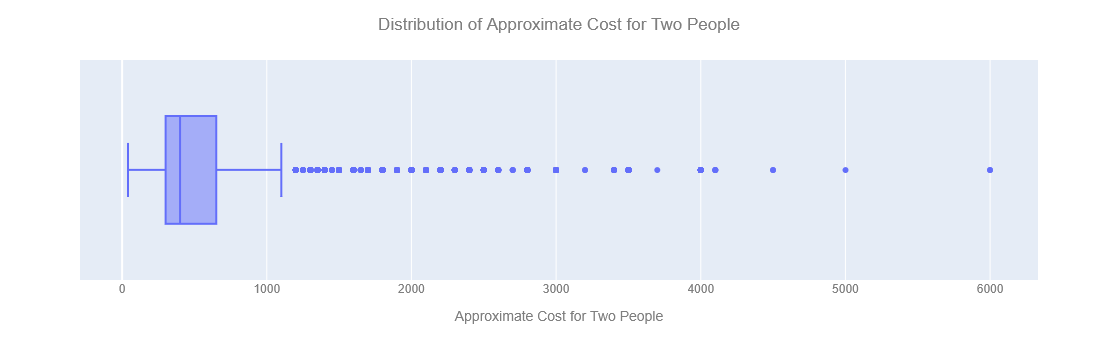

In [168]:
fig = px.box(df , x = 'approx_cost(for two people)')

fig.update_layout(
    title = {
        'text': "Distribution of Approximate Cost for Two People",
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title = "Approximate Cost for Two People",
    font = dict(
        family = "Arial",
        size = 12,
        color = "#7f7f7f"
    )
)

fig.show()

### Exploring (listed_in (type)) Column

In [169]:
df['listed_in(type)'].value_counts()

Delivery              25867
Dine-out              17758
Desserts               3593
Cafes                  1723
Drinks & nightlife     1094
Buffet                  880
Pubs and bars           694
Name: listed_in(type), dtype: int64

### Exploring (listed_in (city)) Column

In [170]:
df['listed_in(city)'].value_counts()

BTM                      3266
Koramangala 7th Block    2935
Koramangala 5th Block    2832
Koramangala 4th Block    2777
Koramangala 6th Block    2622
Jayanagar                2365
JP Nagar                 2095
Indiranagar              1856
MG Road                  1806
Church Street            1793
Brigade Road             1768
Lavelle Road             1741
HSR                      1740
Marathahalli             1657
Residency Road           1619
Whitefield               1617
Bannerghatta Road        1616
Brookefield              1517
Old Airport Road         1422
Kammanahalli             1326
Kalyan Nagar             1305
Basavanagudi             1266
Sarjapur Road            1259
Electronic City          1227
Bellandur                1222
Frazer Town              1185
Malleshwaram             1095
Rajajinagar              1078
Banashankari              862
New BEL Road              740
Name: listed_in(city), dtype: int64

In [171]:
# percentage of missing values
df.isnull().mean() * 100

name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           19.413281
votes                           0.000000
location                        0.040691
rest_type                       0.439846
cuisines                        0.087194
approx_cost(for two people)     0.666550
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [172]:
# dropping nan values
df.dropna(inplace = True)

In [173]:
df.reset_index(drop = True , inplace = True)

### Exploring (cuisines) Column

In [174]:
df['cuisines'].unique

<bound method Series.unique of 0                     North Indian, Mughlai, Chinese
1                        Chinese, North Indian, Thai
2                             Cafe, Mexican, Italian
3                         South Indian, North Indian
4                           North Indian, Rajasthani
                            ...                     
41185                      North Indian, Continental
41186    Andhra, South Indian, Chinese, North Indian
41187                                    Continental
41188                                    Finger Food
41189         Finger Food, North Indian, Continental
Name: cuisines, Length: 41190, dtype: object>

## Feature Engineering

In [175]:
# creating cuisines_counts,rest_type_counts
df['cuisines_counts'] = df['cuisines'].apply(lambda x : len(x.split(',')))
df['rest_type_counts'] = df['rest_type'].apply(lambda x : len(x.split(',')))

In [176]:
df.head()

name online_order book_table  rate  votes      location  \
0                  Jalsa          Yes        Yes   4.1    775  Banashankari   
1         Spice Elephant          Yes         No   4.1    787  Banashankari   
2        San Churro Cafe          Yes         No   3.8    918  Banashankari   
3  Addhuri Udupi Bhojana           No         No   3.7     88  Banashankari   
4          Grand Village           No         No   3.8    166  Basavanagudi   

             rest_type                        cuisines  \
0        Casual Dining  North Indian, Mughlai, Chinese   
1        Casual Dining     Chinese, North Indian, Thai   
2  Cafe, Casual Dining          Cafe, Mexican, Italian   
3          Quick Bites      South Indian, North Indian   
4        Casual Dining        North Indian, Rajasthani   

   approx_cost(for two people) listed_in(type) listed_in(city)  \
0                        800.0          Buffet    Banashankari   
1                        800.0          Buffet    Banashankari   
2                        800.0          Buffet    Banashankari   
3                        300.0          Buffet    Banashankari   
4                        600.0          Buffet    Banashankari   

   cuisines_counts  rest_type_counts  
0                3                 1  
1                3                 1  
2                3                 2  
3                2                 1  
4                2                 1

In [177]:
# split series to a series of lists
df['cuisines_temp'] = df['cuisines'].apply(lambda x : x.replace(', ',',').split(","))
df['cuisines_temp']

0                     [North Indian, Mughlai, Chinese]
1                        [Chinese, North Indian, Thai]
2                             [Cafe, Mexican, Italian]
3                         [South Indian, North Indian]
4                           [North Indian, Rajasthani]
                             ...                      
41185                      [North Indian, Continental]
41186    [Andhra, South Indian, Chinese, North Indian]
41187                                    [Continental]
41188                                    [Finger Food]
41189         [Finger Food, North Indian, Continental]
Name: cuisines_temp, Length: 41190, dtype: object

In [178]:
# creating an instance of multilabelbinarizer
mlb = MultiLabelBinarizer()

In [179]:
# creating dataFrame & transforming into binary matrix representation using multilabelbinarizer
df_cuisines_encoded = pd.DataFrame(mlb.fit_transform(df["cuisines_temp"]) , columns = mlb.classes_)

In [180]:
df.drop('cuisines_temp' , axis = 1 , inplace = True)

In [181]:
df_cuisines_encoded

Afghan  Afghani  African  American  Andhra  Arabian  Asian  Assamese  \
0           0        0        0         0       0        0      0         0   
1           0        0        0         0       0        0      0         0   
2           0        0        0         0       0        0      0         0   
3           0        0        0         0       0        0      0         0   
4           0        0        0         0       0        0      0         0   
...       ...      ...      ...       ...     ...      ...    ...       ...   
41185       0        0        0         0       0        0      0         0   
41186       0        0        0         0       1        0      0         0   
41187       0        0        0         0       0        0      0         0   
41188       0        0        0         0       0        0      0         0   
41189       0        0        0         0       0        0      0         0   

       Australian  Awadhi  ...  Sushi  Tamil  Tea  Tex-Mex  Thai  Tibetan  \
0               0       0  ...      0      0    0        0     0        0   
1               0       0  ...      0      0    0        0     1        0   
2               0       0  ...      0      0    0        0     0        0   
3               0       0  ...      0      0    0        0     0        0   
4               0       0  ...      0      0    0        0     0        0   
...           ...     ...  ...    ...    ...  ...      ...   ...      ...   
41185           0       0  ...      0      0    0        0     0        0   
41186           0       0  ...      0      0    0        0     0        0   
41187           0       0  ...      0      0    0        0     0        0   
41188           0       0  ...      0      0    0        0     0        0   
41189           0       0  ...      0      0    0        0     0        0   

       Turkish  Vegan  Vietnamese  Wraps  
0            0      0           0      0  
1            0      0           0      0  
2            0      0           0      0  
3            0      0           0      0  
4            0      0           0      0  
...        ...    ...         ...    ...  
41185        0      0           0      0  
41186        0      0           0      0  
41187        0      0           0      0  
41188        0      0           0      0  
41189        0      0           0      0  

[41190 rows x 105 columns]

In [182]:
# dropping the first column because its duplicated
df_cuisines_encoded = df_cuisines_encoded.iloc[:, 1:]

### Business Questions

**1- What are the most popular restaurants among Bangalore restaurants?**


In [183]:
# identify potential competitors and determine what strategies you could use to differentiate your restaurant from theirs
df.groupby('name').agg({
    'votes':'sum'}).sort_values('votes', ascending = False).head(10).reset_index()

name   votes
0                       Onesta  347520
1                     Truffles  301059
2            Empire Restaurant  229808
3                     Hammered  180602
4              The Black Pearl  172122
5                Meghana Foods  129557
6              Barbeque Nation  108425
7          Smally's Resto Cafe  102877
8  Byg Brewski Brewing Company   99531
9             Gilly's Restobar   98808

**2- What are the top 10 popular cuisines offered by Bangalore restaurants?**

In [184]:
# inform decisions about what type of cuisine to offer or what menu items to prioritize
df_cuisines_encoded.sum().sort_values(ascending = False).head(10)

North Indian    17180
Chinese         12834
South Indian     6351
Fast Food        6310
Continental      5180
Biryani          5008
Cafe             4781
Desserts         4501
Beverages        3828
Italian          3167
dtype: int64

**3- What are the top 10 expensive restaurant types in average?**


In [185]:
# adjust pricing strategy,which types customers are willing to pay more for
df.groupby('rest_type').agg({
    'approx_cost(for two people)':'mean'
}).sort_values('approx_cost(for two people)', ascending = False).reset_index().head(10)

rest_type  approx_cost(for two people)
0           Fine Dining, Bar                  3015.384615
1  Fine Dining, Microbrewery                  3000.000000
2        Fine Dining, Lounge                  3000.000000
3                Fine Dining                  2722.807018
4                Bar, Lounge                  2450.000000
5        Club, Casual Dining                  2400.000000
6                       Club                  2150.000000
7                Lounge, Bar                  2027.777778
8       Lounge, Microbrewery                  2000.000000
9           Bar, Quick Bites                  2000.000000

**4- Which locations in Bangalore have the highest concentration of restaurants?**

In [186]:
# identify popular areas, insight into the level of competition in different areas
high_concent = df.groupby('location').agg(
    {'name':'count'}).head(10).reset_index().rename(columns={'name':'num of restaurants'})
high_concent = high_concent.sort_values(by='num of restaurants', ascending=False)

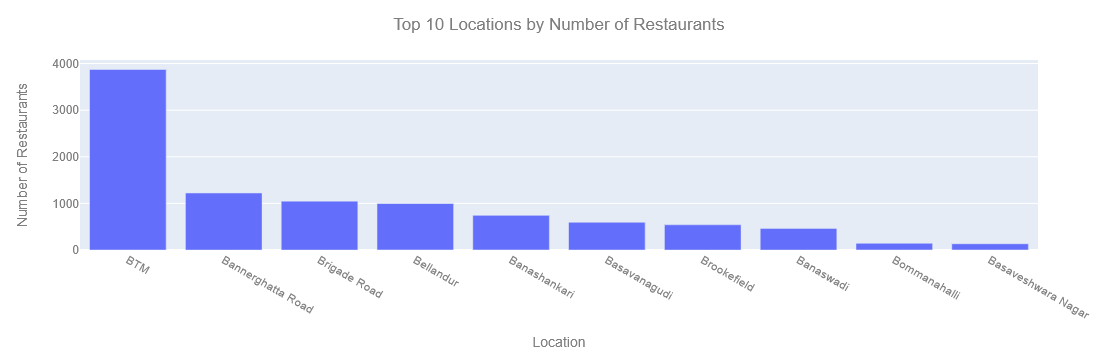

In [187]:
fig = px.bar(high_concent, x = 'location', y = 'num of restaurants')

fig.update_layout(
    title = {
        'text': "Top 10 Locations by Number of Restaurants",
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title = "Location",
    yaxis_title = "Number of Restaurants",
    font = dict(
        family = "Arial",
        size = 12,
        color = "#7f7f7f"
    )
)
fig.show()

**5- What is the distribution of restaurant ratings in Bangalore?**

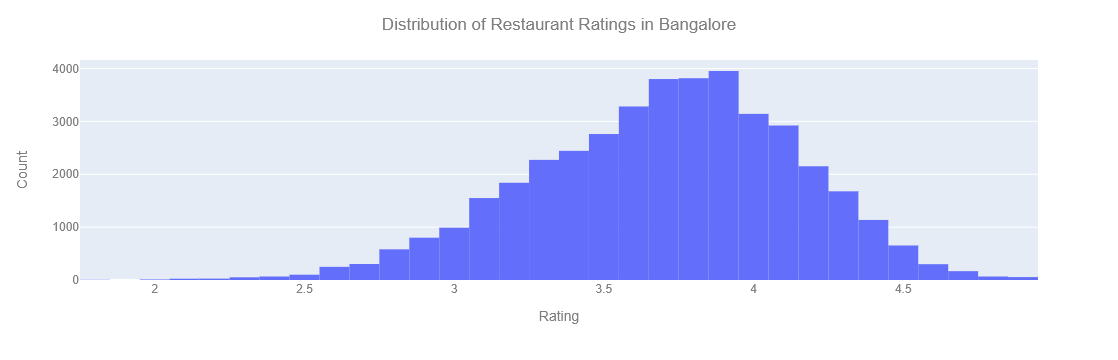

In [188]:
# insights into the quality of the restaurant industry in the city
fig = px.histogram(df, x = 'rate')

fig.update_layout(
    title={
        'text': "Distribution of Restaurant Ratings in Bangalore",
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title = "Rating",
    yaxis_title = "Count",
    font = dict(
        family = "Arial",
        size = 12,
        color = "#7f7f7f"
    )
)

fig.show()

**6- Is there a correlation between the number of votes a restaurant receives and its ratings?**

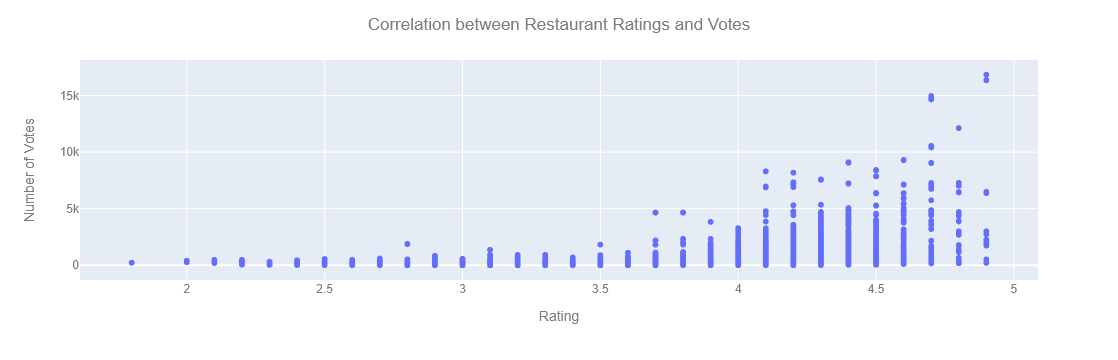

In [189]:
# relationship between a restaurant's popularity and customer satisfaction
fig = px.scatter(data_frame = df, x = 'rate', y = 'votes')

fig.update_layout(
    title = {
        'text': "Correlation between Restaurant Ratings and Votes",
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title = "Rating",
    yaxis_title = "Number of Votes",
    font = dict(
        family = "Arial",
        size = 12,
        color = "#7f7f7f"
    )
)

fig.show()

In [190]:
df[['votes','rate']].corr()

votes      rate
votes  1.000000  0.434746
rate   0.434746  1.000000

**7- What are the top 10 rated restaurants?**

In [191]:
# identify successful strategies,understand customer preferences
df.groupby('name').agg({
    'rate' : 'mean'
}).sort_values('rate', ascending = False).head(10).reset_index()

name      rate
0  SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...  4.900000
1                        Byg Brewski Brewing Company  4.900000
2                     Asia Kitchen By Mainland China  4.900000
3                                       Punjab Grill  4.871429
4                             Belgian Waffle Factory  4.844828
5                                           Flechazo  4.800000
6                                   The Pizza Bakery  4.800000
7                                 O.G. Variar & Sons  4.800000
8                          AB's - Absolute Barbecues  4.789474
9                                         Biergarten  4.766667

**8- What types of restaurants are more likely to provide online ordering and table booking options?**

In [192]:
# identify customer expectations,investing in technology, hiring staff to manage reservations and orders or developing partnerships with third-party providers
df[(df['online_order'] == 'Yes') & (df['book_table'] == 'Yes')]['rest_type'].value_counts()

Casual Dining                  1835
Casual Dining, Bar              499
Cafe                            427
Casual Dining, Cafe             212
Bar, Casual Dining               99
Quick Bites                      89
Pub                              86
Bar                              69
Pub, Casual Dining               50
Casual Dining, Pub               43
Pub, Cafe                        40
Microbrewery, Casual Dining      36
Pub, Microbrewery                23
Casual Dining, Microbrewery      20
Cafe, Bar                        19
Microbrewery                     18
Microbrewery, Pub                18
Club                             16
Fine Dining                      15
Casual Dining, Irani Cafee       15
Cafe, Dessert Parlor             14
Cafe, Casual Dining              14
Fine Dining, Lounge              14
Pub, Bar                         13
Lounge                            9
Lounge, Casual Dining             8
Cafe, Bakery                      8
Casual Dining, Lounge       

**9- Is there a difference in the average ratings between restaurants that offer online ordering and those that do not?**

In [193]:
# identify customer satisfaction
df.groupby('online_order').agg({
    'rate':'mean'
}).reset_index().rename(columns = {'rate':'average_rate'})

online_order  average_rate
0           No      3.659538
1          Yes      3.723796

**10- Are there any areas in Bangalore that are known for specific types of cuisine?**

In [194]:
# understand the types of food that are popular in different neighborhoods
df_cuisines_encoded = pd.concat([df_cuisines_encoded , df["location"]] ,  axis = 1 )
df_cuisines_encoded.groupby("location").sum()

Afghani  African  American  Andhra  Arabian  Asian  \
location                                                                
BTM                      0        0        27     154      176     39   
Banashankari             0        0         4       8        2      6   
Banaswadi                0        0         0      34       10      2   
Bannerghatta Road        0        8        30      55       35     13   
Basavanagudi             0        0         0      14        0     10   
...                    ...      ...       ...     ...      ...    ...   
West Bangalore           0        0         1       0        0      1   
Whitefield               0        5        73      97       34     69   
Wilson Garden            0        0         0       6       19      0   
Yelahanka                0        0         0       0        0      0   
Yeshwantpur              0        0         4       3        2      0   

                   Assamese  Australian  Awadhi  BBQ  ...  Sushi  Tamil  Tea  \
location                                              ...                      
BTM                       0           0       0   45  ...      0      0   31   
Banashankari              0           0       0    0  ...      0      0    3   
Banaswadi                 0           0       0    4  ...      0      0    0   
Bannerghatta Road         0           0       0   16  ...      0      0    5   
Basavanagudi              0           0       0    0  ...      0      0    0   
...                     ...         ...     ...  ...  ...    ...    ...  ...   
West Bangalore            0           0       0    0  ...      0      0    0   
Whitefield                0           0       0   34  ...      7      0    8   
Wilson Garden             0           0       0    0  ...      0      0    0   
Yelahanka                 0           0       0    0  ...      0      0    0   
Yeshwantpur               0           0       0    0  ...      0      0    0   

                   Tex-Mex  Thai  Tibetan  Turkish  Vegan  Vietnamese  Wraps  
location                                                                      
BTM                      0    13       37        7      0           0     11  
Banashankari             0    20        5        0      0           7      0  
Banaswadi                0    10        4        0      0           2      0  
Bannerghatta Road        9    24       16        0      0           5      0  
Basavanagudi             0     4        0        0      0           0      0  
...                    ...   ...      ...      ...    ...         ...    ...  
West Bangalore           0     0        0        0      0           0      0  
Whitefield               2    21        4        0      0           6      0  
Wilson Garden            0     0        0        0      0           0      0  
Yelahanka                0     0        0        0      0           0      0  
Yeshwantpur              0     1        0        0      0           0      0  

[92 rows x 104 columns]

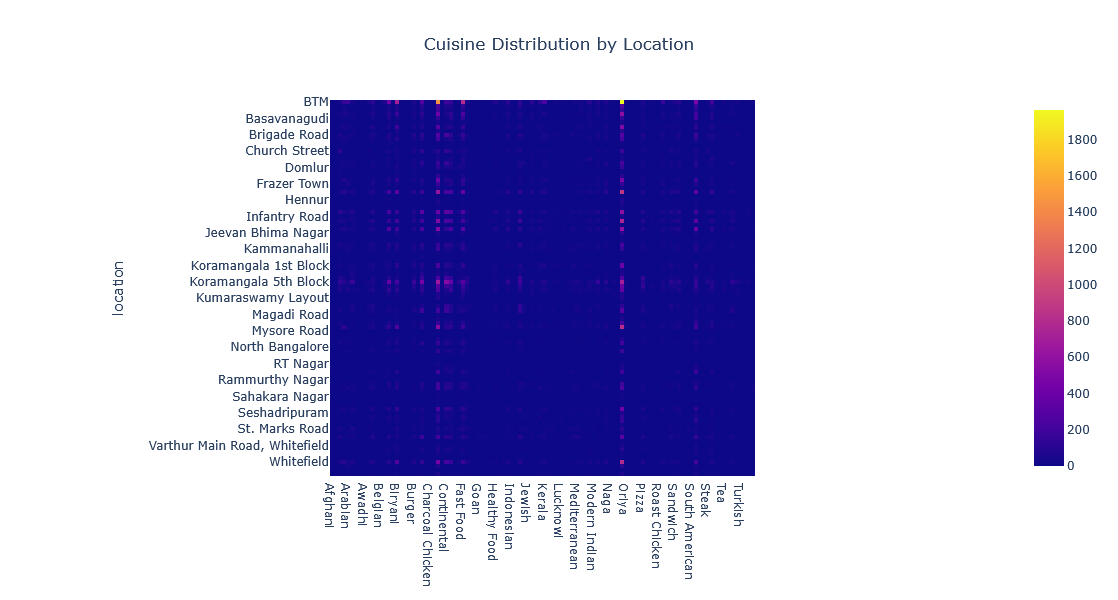

In [195]:
px.imshow(df_cuisines_encoded.groupby("location").sum(), 
          title="Cuisine Distribution by Location"
).update_layout(title_x=0.5, width=800, height=600)

In [196]:
df_cuisines_encoded = df_cuisines_encoded.groupby("location").sum().idxmax(axis=1)
df_cuisines_encoded

location
BTM                  North Indian
Banashankari         North Indian
Banaswadi                 Chinese
Bannerghatta Road    North Indian
Basavanagudi         South Indian
                         ...     
West Bangalore       Healthy Food
Whitefield           North Indian
Wilson Garden        North Indian
Yelahanka            South Indian
Yeshwantpur          North Indian
Length: 92, dtype: object

**11- How are restaurant ratings distributed based on the approximate cost for two people?**

In [197]:
# relationship between price and customer satisfaction
df[['approx_cost(for two people)' , 'rate']].corr()

approx_cost(for two people)      rate
approx_cost(for two people)                     1.000000  0.384481
rate                                            0.384481  1.000000

**12- Is there any variation in restaurant ratings based on the type of listing, such as buffet, delivery, or dine-out?**

In [198]:
# customer's expectations vary based on the type of restaurant
df.groupby('rest_type').agg({
    'rate':'mean'
}).reset_index().sort_values('rate', ascending = False)

rest_type      rate
70                  Pub, Cafe  4.657500
9                    Bar, Pub  4.600000
63               Microbrewery  4.478571
72          Pub, Microbrewery  4.454667
64          Microbrewery, Bar  4.446154
..                        ...       ...
15                 Bhojanalya  3.266667
52  Food Court, Casual Dining  3.240000
1       Bakery, Beverage Shop  3.200000
4          Bakery, Food Court  3.100000
42      Dessert Parlor, Kiosk  3.000000

[87 rows x 2 columns]

### Data Preparation for Machine Learning

In [199]:
# creating target column
def create_target(x):
    if x >= 3.75:
        return 1
    else:
        return 0

In [200]:
df['rate'].apply(create_target)

0        1
1        1
2        1
3        0
4        1
        ..
41185    0
41186    0
41187    0
41188    1
41189    0
Name: rate, Length: 41190, dtype: int64

In [201]:
df['Target'] = df['rate'].apply(create_target)

In [202]:
df['Target'].value_counts()

0    21153
1    20037
Name: Target, dtype: int64

In [203]:
# drop unnecessary columns
df.drop(['name' , 'cuisines' , 'rest_type' , 'rate'] , axis = 1, inplace = True)

In [204]:
df.duplicated().sum()

272

In [205]:
df.drop_duplicates(inplace = True)

In [206]:
df.reset_index(drop = True , inplace= True)

### Selecting the Optimal Encoding Technique

In [207]:
#select all categorical features
Cat_features = df.select_dtypes(include='object')
Num_features = df.select_dtypes(include='number')

In [208]:
# number of unique values in categorical features
for feature in Cat_features:
    print(f"Feature {feature} has {df[feature].nunique()} unique values")

Feature online_order has 2 unique values
Feature book_table has 2 unique values
Feature location has 92 unique values
Feature listed_in(type) has 7 unique values
Feature listed_in(city) has 30 unique values


## Feature Engineering

 ****Location Column****

In [209]:
# percentage of records for each unique value
df_locations = df['location'].value_counts(normalize=True)*100
df_locations

BTM                      9.308862
Koramangala 5th Block    5.608779
HSR                      4.829171
Indiranagar              4.350164
JP Nagar                 4.144875
                           ...   
Yelahanka                0.009776
West Bangalore           0.007332
Rajarajeshwari Nagar     0.004888
Nagarbhavi               0.002444
Peenya                   0.002444
Name: location, Length: 92, dtype: float64

In [210]:
# count of locations with prevalence above 0.5%
len(df_locations[df_locations.values > 0.5])

44

In [211]:
Desired_index = df_locations[df_locations.values > 0.5]
Desired_index

BTM                      9.308862
Koramangala 5th Block    5.608779
HSR                      4.829171
Indiranagar              4.350164
JP Nagar                 4.144875
Jayanagar                3.988465
Whitefield               3.741630
Marathahalli             3.377487
Bannerghatta Road        2.969353
Koramangala 7th Block    2.573440
Brigade Road             2.561220
Koramangala 6th Block    2.558776
Bellandur                2.397478
Koramangala 1st Block    2.079769
Sarjapur Road            2.057774
Koramangala 4th Block    2.055330
Ulsoor                   2.047998
Electronic City          1.999120
MG Road                  1.935578
Banashankari             1.806051
Kalyan Nagar             1.691187
Malleshwaram             1.564104
Richmond Road            1.473679
Residency Road           1.459016
Basavanagudi             1.446796
Frazer Town              1.373479
Brookefield              1.327044
Church Street            1.327044
New BEL Road             1.231732
Kammanahalli  

In [212]:
def fix_location (x):
    if x in Desired_index:
        return x
    else:
        return 'other'

In [213]:
# grouping locations with low concentration in a new category
df['location'] = df['location'].apply(fix_location)

***Listed_in (city) Column***

In [214]:
# we can't categorize here as they have similar distributions
df["listed_in(city)"].value_counts(normalize = True) * 100

BTM                      6.249084
Koramangala 7th Block    5.728530
Koramangala 4th Block    5.479251
Koramangala 5th Block    5.449924
Koramangala 6th Block    5.159099
Jayanagar                4.660541
JP Nagar                 3.959138
Indiranagar              3.736742
MG Road                  3.678088
Church Street            3.636541
Brigade Road             3.614546
Lavelle Road             3.536341
Residency Road           3.277286
HSR                      3.221076
Marathahalli             3.101325
Bannerghatta Road        2.925363
Whitefield               2.871597
Old Airport Road         2.849602
Brookefield              2.751845
Basavanagudi             2.610098
Kammanahalli             2.483015
Sarjapur Road            2.448800
Kalyan Nagar             2.414585
Frazer Town              2.316829
Malleshwaram             2.307053
Bellandur                2.304609
Rajajinagar              2.111540
Electronic City          1.964905
Banashankari             1.766949
New BEL Road  

In [215]:
for feature in Cat_features:
    print(f"Feature {feature} has {df[feature].nunique()} unique values")

Feature online_order has 2 unique values
Feature book_table has 2 unique values
Feature location has 45 unique values
Feature listed_in(type) has 7 unique values
Feature listed_in(city) has 30 unique values


<!-- One Hot Encoding For :

- online_order
- book_table
- listed_in(type)

 Binary Encoder For:

- location
- listed_in(city)

 -->

**we will use one hot encoding for online_order, book_table, listed_in(type) & Binary encoder for location, listed_in(city)**

### Selecting the Optimal Scaling Technique

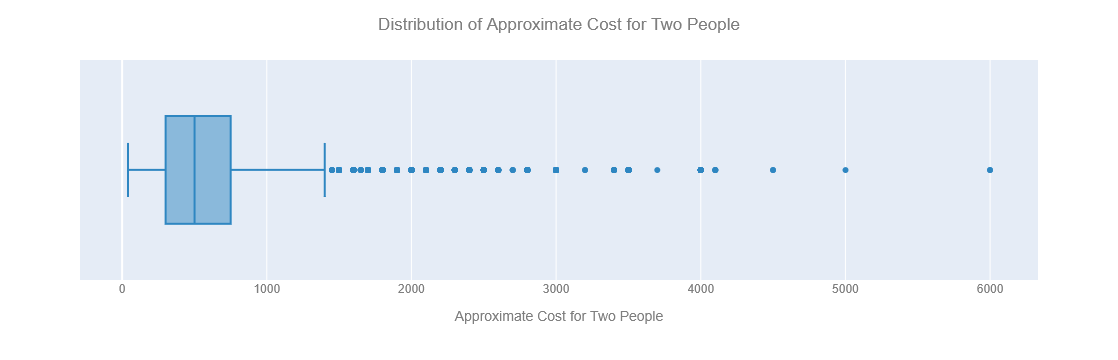

In [216]:
# There are many outliers in approx_cost(for two people) , so we will use robust scaler for scaling data.
fig = px.box(df , x = "approx_cost(for two people)",
             color_discrete_sequence = ['#2E86C1'])

fig.update_layout(
    title = {
        'text': "Distribution of Approximate Cost for Two People",
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title = "Approximate Cost for Two People",
        font = dict(
        family = "Arial",
        size = 12,
        color = "#7f7f7f"
    )
)

fig.show()

In [217]:
df.to_pickle('Bangalore_Rest_After_EDA.pkl')